In [1]:
import requests
import re
from bs4 import BeautifulSoup
import numpy as np

In [2]:
#bhk
#area
#city
#status
#price
#owner
#carpet area
#transaction
#furnishing
#facing

In [3]:
url = "https://www.magicbricks.com/villa-for-sale-in-hyderabad-pppfs"

In [4]:
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"}
page = requests.get(url,headers=headers)
page

<Response [200]>

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>
Villas for Sale in Hyderabad: 3702+ Independent Villas in Hyderabad
</title>
<link href="https://fonts.gstatic.com" rel="dns-prefetch"/>
<link href="https://cdn.staticmb.com" rel="preconnect"/>
<link href="https://img.staticmb.com" rel="preconnect"/>
<link href="https://www.googletagmanager.com" rel="dns-prefetch"/>
<link href="https://www.google-analytics.com" rel="dns-prefetch"/>
<link href="https://cdn.staticmb.com/images/favicon.ico" rel="shortcut icon"/>
<meta content="Find over 3702+ Villa for Sale in Hyderabad. Get details of Ventilated Residential Independent Villas in Hyderabad that are available in a combination of 2BHK, 3BHK, and 4BHK. 
" name="description"/>
<link as="image" fetchpriority="high" href="https://img.staticmb.com/mbphoto/property/cropped_images/2024/Aug/20/Ph
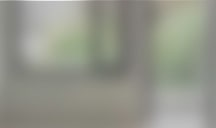
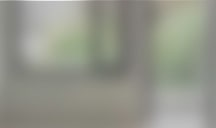

In [5]:
soup = BeautifulSoup(page.text)
soup

In [6]:
for i in soup.find_all("h2",class_ = "mb-srp__card--title"):
    print(i.text)

3 BHK Villa for Sale in Kompally, Hyderabad
3 BHK Villa for Sale in Kompally, Hyderabad
3 BHK Villa for Sale in Srisailam Highway, Hyderabad
3 BHK Villa for Sale in Pragathi Nagar, Kukatpally, Hyderabad
3 BHK Villa for Sale in Patancheruvu, Hyderabad
5 BHK Villa for Sale in Bandlaguda Jagir, Hyderabad
3 BHK Villa for Sale in Tukkuguda, Srisailam Highway, Hyderabad
3 BHK Villa for Sale in Muthangi, NH 9, Hyderabad
2 BHK Villa for Sale in Osman Nagar, Hyderabad
4 BHK Villa for Sale in Golf Pride Homes, Secunderabad, Hyderabad
2 BHK Villa for Sale in Boduppal, NH 2 2, Hyderabad
4 BHK Villa for Sale in Madhura Nagar Nizampet, Hyderabad
4 BHK Villa for Sale in Bachupally, Hyderabad
3 BHK Villa for Sale in Kardanur, Hyderabad
4 BHK Villa for Sale in Maheshwaram, Hyderabad
4 BHK Villa for Sale in Sainikpuri, Hyderabad
4 BHK Villa for Sale in Dundigal, Outer Ring Road, Hyderabad
4 BHK Villa for Sale in Kompally, Hyderabad
4 BHK Villa for Sale in Moinabad, Chevella Road, Hyderabad
3 BHK Villa f

In [7]:
a=[]
for i in soup.find_all("div",class_="mb-srp__card__summary--value"):
    a.append(i.text)

In [126]:
bhk = []
area = []
total_price= []
carpet_area = []
owner_name = []
status = []
transaction = []
furnishing = []
facing = []
price_in_rps_per_sqft = []
for i in range(1,22):
    url =f"https://www.magicbricks.com/villa-for-sale-in-hyderabad-pppfs/page-{i}"
    for i in soup.find_all("h2",class_ = "mb-srp__card--title"):
        if re.findall(r"\d BHK",i.text):
            bhk.append("".join(re.findall(r"\d BHK",i.text)))
        else:
            bhk.append(np.nan)
        if re.findall(r"in\s+([A-Za-z]+(?:[\s-][A-Za-z]+)*)",i.text):
            area.append("".join(re.findall(r"in\s+([A-Za-z]+(?:[\s-][A-Za-z]+)*)",i.text)))
        else:
            area.append(np.nan)
    for i in soup.find_all("div",class_="mb-srp__card__price--amount"):
        total_price.append(i.text)
    for i in a:
        if re.search(r"\d+ sqft", i) or re.search(r"\d+ sqyrd", i):
            carpet_area.append(' '.join(i.split()[:3]))
    for i in soup.find_all("div",class_="mb-srp__card__ads--name"):
        if re.findall(r"Owner:\s*([\w\s]+)",i.text):
            owner_name.append("".join(re.findall(r"Owner:\s*([\w\s]+)",i.text)))
        else:
            owner_name.append(np.nan)
    for i in a:
        if re.search(r"Ready to Move",i):
            status.append(' '.join(i.split()[:3]))
    for i in a:
        if re.search(r"Resale",i) or re.search(r"New Property",i):
            transaction.append(' '.join(i.split()[:3]))
    for i in a:
        if re.search(r"Furnished",i) or re.search(r"Unfurnished",i) or re.search(r"Semi-Furnished",i):
            furnishing.append(' '.join(i.split()[:3]))
    for i in a:
        if re.search(r"East",i) or re.search(r"West",i) or re.search(r"North",i) or re.search(r"South",i):
            facing.append(' '.join(i.split()[:3]))
    for i in soup.find_all("div",class_="mb-srp__card__price--size"):
        if re.findall(r"\d",i.text):
            price_in_rps_per_sqft.append("".join(re.findall(r"\d",i.text)))
        else:
            price_in_rps_per_sqft.append(np.nan)

In [128]:
print(len(bhk))
print(len(area))
print(len(total_price))
print(len(carpet_area))
print(len(owner_name))
print(len(transaction))
print(len(furnishing))
print(len(facing))
print(len(price_in_rps_per_sqft))

630
630
630
630
630
630
630
567
630


In [130]:
import pandas as pd

# Your dictionary with lists of different lengths
abcd = {"bhk":bhk,"area":area,"carpet_area":carpet_area,"furnishing":furnishing,"facing":facing,"transaction":transaction,"total_price":total_price,"owner_name":owner_name,"price_in_rps_per_sqft":price_in_rps_per_sqft}

# Step 1: Find the maximum length of all lists in the dictionary
max_len = max(len(lst) for lst in abcd.values())

# Step 2: Pad each list to make them all the same length
for key in abcd:
    abcd[key] += [None] * (max_len - len(abcd[key]))

# Step 3: Convert the dictionary to a DataFrame
df = pd.DataFrame(abcd)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   bhk                    630 non-null    object
 1   area                   630 non-null    object
 2   carpet_area            630 non-null    object
 3   furnishing             630 non-null    object
 4   facing                 567 non-null    object
 5   transaction            630 non-null    object
 6   total_price            630 non-null    object
 7   owner_name             630 non-null    object
 8   price_in_rps_per_sqft  630 non-null    object
dtypes: object(9)
memory usage: 44.4+ KB


In [134]:
df.to_csv(r"C:\Users\prade\OneDrive\Desktop\magicbricks.csv")

In [136]:
df = pd.read_csv(r"C:\Users\prade\OneDrive\Desktop\magicbricks.csv")

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             630 non-null    int64 
 1   bhk                    630 non-null    object
 2   area                   630 non-null    object
 3   carpet_area            630 non-null    object
 4   furnishing             630 non-null    object
 5   facing                 567 non-null    object
 6   transaction            630 non-null    object
 7   total_price            630 non-null    object
 8   owner_name             630 non-null    object
 9   price_in_rps_per_sqft  630 non-null    int64 
dtypes: int64(2), object(8)
memory usage: 49.3+ KB
